In [1]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 300, bias=False),
            nn.Sigmoid(),
            nn.Linear(300, 10, bias=False)
        )
    
    def forward(self, x):
        return self.layers(x)

In [3]:
torch.manual_seed(3)

In [4]:
train_dataset = MNIST('./mnist_train/', train=True, download=True, transform=transforms.ToTensor())

In [5]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [6]:
test_dataset = MNIST('./mnist_test', train=False, download=True, transform=transforms.ToTensor())

In [7]:
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [8]:
torch.manual_seed(3)

In [9]:
mlp = MLP()

In [10]:
ce_loss = nn.CrossEntropyLoss()

In [11]:
optimizer = torch.optim.SGD(mlp.parameters(), lr=10)

In [12]:
costs = []

In [13]:
print('Starting training...')
for epoch in range(0, 200):
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    epoch_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = ce_loss(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        if i % 100 == 99:
            print('Loss after batch %5d: %.3f' % ((i+1)*64, current_loss))
            epoch_loss+=current_loss
            current_loss = 0.0
    costs.append(epoch_loss)
print('Training completed')

Starting training...
Starting epoch 1
Loss after batch  6400: 236.813
Loss after batch 12800: 180.239
Loss after batch 19200: 161.961
Loss after batch 25600: 155.374
Loss after batch 32000: 151.230
Loss after batch 38400: 124.066
Loss after batch 44800: 102.088
Loss after batch 51200: 92.601
Loss after batch 57600: 85.880
Starting epoch 2
Loss after batch  6400: 75.039
Loss after batch 12800: 72.140
Loss after batch 19200: 71.526
Loss after batch 25600: 63.084
Loss after batch 32000: 66.237
Loss after batch 38400: 63.155
Loss after batch 44800: 62.507
Loss after batch 51200: 62.879
Loss after batch 57600: 59.974
Starting epoch 3
Loss after batch  6400: 57.130
Loss after batch 12800: 56.404
Loss after batch 19200: 53.259
Loss after batch 25600: 51.883
Loss after batch 32000: 55.030
Loss after batch 38400: 51.347
Loss after batch 44800: 51.359
Loss after batch 51200: 53.208
Loss after batch 57600: 51.304
Starting epoch 4
Loss after batch  6400: 45.753
Loss after batch 12800: 43.299
Loss 

Loss after batch 38400: 19.492
Loss after batch 44800: 19.591
Loss after batch 51200: 19.343
Loss after batch 57600: 17.595
Starting epoch 29
Loss after batch  6400: 17.135
Loss after batch 12800: 18.495
Loss after batch 19200: 17.511
Loss after batch 25600: 19.260
Loss after batch 32000: 17.714
Loss after batch 38400: 17.703
Loss after batch 44800: 18.708
Loss after batch 51200: 19.504
Loss after batch 57600: 18.412
Starting epoch 30
Loss after batch  6400: 14.725
Loss after batch 12800: 20.016
Loss after batch 19200: 18.364
Loss after batch 25600: 19.508
Loss after batch 32000: 17.872
Loss after batch 38400: 18.118
Loss after batch 44800: 17.357
Loss after batch 51200: 19.323
Loss after batch 57600: 20.881
Starting epoch 31
Loss after batch  6400: 17.564
Loss after batch 12800: 18.249
Loss after batch 19200: 17.894
Loss after batch 25600: 17.929
Loss after batch 32000: 18.918
Loss after batch 38400: 19.234
Loss after batch 44800: 18.549
Loss after batch 51200: 17.720
Loss after batch

Loss after batch 19200: 12.392
Loss after batch 25600: 12.826
Loss after batch 32000: 12.630
Loss after batch 38400: 13.160
Loss after batch 44800: 12.922
Loss after batch 51200: 12.613
Loss after batch 57600: 13.733
Starting epoch 57
Loss after batch  6400: 13.288
Loss after batch 12800: 12.854
Loss after batch 19200: 13.066
Loss after batch 25600: 13.592
Loss after batch 32000: 12.133
Loss after batch 38400: 11.640
Loss after batch 44800: 11.725
Loss after batch 51200: 10.869
Loss after batch 57600: 12.935
Starting epoch 58
Loss after batch  6400: 11.328
Loss after batch 12800: 11.741
Loss after batch 19200: 12.499
Loss after batch 25600: 12.411
Loss after batch 32000: 11.979
Loss after batch 38400: 12.566
Loss after batch 44800: 12.729
Loss after batch 51200: 12.187
Loss after batch 57600: 13.417
Starting epoch 59
Loss after batch  6400: 11.364
Loss after batch 12800: 12.195
Loss after batch 19200: 13.321
Loss after batch 25600: 11.018
Loss after batch 32000: 13.641
Loss after batch

Starting epoch 84
Loss after batch  6400: 9.477
Loss after batch 12800: 8.479
Loss after batch 19200: 8.490
Loss after batch 25600: 11.370
Loss after batch 32000: 9.776
Loss after batch 38400: 10.446
Loss after batch 44800: 9.858
Loss after batch 51200: 9.297
Loss after batch 57600: 9.326
Starting epoch 85
Loss after batch  6400: 9.474
Loss after batch 12800: 8.863
Loss after batch 19200: 10.169
Loss after batch 25600: 9.636
Loss after batch 32000: 9.849
Loss after batch 38400: 12.631
Loss after batch 44800: 10.715
Loss after batch 51200: 10.645
Loss after batch 57600: 10.542
Starting epoch 86
Loss after batch  6400: 9.758
Loss after batch 12800: 9.485
Loss after batch 19200: 9.597
Loss after batch 25600: 10.359
Loss after batch 32000: 9.172
Loss after batch 38400: 9.436
Loss after batch 44800: 10.724
Loss after batch 51200: 9.014
Loss after batch 57600: 11.446
Starting epoch 87
Loss after batch  6400: 9.982
Loss after batch 12800: 9.410
Loss after batch 19200: 9.505
Loss after batch 2

Loss after batch 25600: 8.064
Loss after batch 32000: 7.474
Loss after batch 38400: 9.131
Loss after batch 44800: 7.301
Loss after batch 51200: 7.197
Loss after batch 57600: 7.691
Starting epoch 113
Loss after batch  6400: 7.251
Loss after batch 12800: 6.544
Loss after batch 19200: 7.968
Loss after batch 25600: 8.619
Loss after batch 32000: 8.423
Loss after batch 38400: 7.459
Loss after batch 44800: 7.767
Loss after batch 51200: 7.345
Loss after batch 57600: 7.259
Starting epoch 114
Loss after batch  6400: 6.841
Loss after batch 12800: 8.014
Loss after batch 19200: 6.234
Loss after batch 25600: 7.517
Loss after batch 32000: 6.975
Loss after batch 38400: 6.954
Loss after batch 44800: 7.088
Loss after batch 51200: 8.922
Loss after batch 57600: 8.561
Starting epoch 115
Loss after batch  6400: 6.502
Loss after batch 12800: 6.551
Loss after batch 19200: 9.168
Loss after batch 25600: 8.966
Loss after batch 32000: 6.097
Loss after batch 38400: 7.339
Loss after batch 44800: 7.534
Loss after ba

Loss after batch 51200: 5.934
Loss after batch 57600: 6.227
Starting epoch 141
Loss after batch  6400: 4.768
Loss after batch 12800: 4.940
Loss after batch 19200: 5.291
Loss after batch 25600: 5.192
Loss after batch 32000: 6.419
Loss after batch 38400: 6.456
Loss after batch 44800: 5.874
Loss after batch 51200: 5.391
Loss after batch 57600: 6.271
Starting epoch 142
Loss after batch  6400: 3.784
Loss after batch 12800: 6.099
Loss after batch 19200: 6.498
Loss after batch 25600: 6.159
Loss after batch 32000: 6.629
Loss after batch 38400: 5.870
Loss after batch 44800: 7.340
Loss after batch 51200: 5.488
Loss after batch 57600: 6.168
Starting epoch 143
Loss after batch  6400: 5.819
Loss after batch 12800: 4.854
Loss after batch 19200: 5.775
Loss after batch 25600: 5.692
Loss after batch 32000: 6.530
Loss after batch 38400: 5.717
Loss after batch 44800: 5.862
Loss after batch 51200: 5.520
Loss after batch 57600: 6.215
Starting epoch 144
Loss after batch  6400: 6.582
Loss after batch 12800: 

Loss after batch 12800: 4.746
Loss after batch 19200: 3.935
Loss after batch 25600: 4.162
Loss after batch 32000: 4.593
Loss after batch 38400: 4.755
Loss after batch 44800: 5.698
Loss after batch 51200: 4.191
Loss after batch 57600: 4.591
Starting epoch 170
Loss after batch  6400: 4.347
Loss after batch 12800: 4.502
Loss after batch 19200: 4.321
Loss after batch 25600: 5.316
Loss after batch 32000: 6.057
Loss after batch 38400: 5.420
Loss after batch 44800: 6.207
Loss after batch 51200: 6.021
Loss after batch 57600: 5.360
Starting epoch 171
Loss after batch  6400: 5.156
Loss after batch 12800: 5.070
Loss after batch 19200: 6.862
Loss after batch 25600: 5.392
Loss after batch 32000: 4.835
Loss after batch 38400: 5.285
Loss after batch 44800: 5.199
Loss after batch 51200: 5.472
Loss after batch 57600: 5.181
Starting epoch 172
Loss after batch  6400: 4.335
Loss after batch 12800: 5.646
Loss after batch 19200: 6.547
Loss after batch 25600: 5.558
Loss after batch 32000: 6.228
Loss after ba

Loss after batch 38400: 4.903
Loss after batch 44800: 4.474
Loss after batch 51200: 3.724
Loss after batch 57600: 4.219
Starting epoch 198
Loss after batch  6400: 3.254
Loss after batch 12800: 4.494
Loss after batch 19200: 4.504
Loss after batch 25600: 3.243
Loss after batch 32000: 4.471
Loss after batch 38400: 3.684
Loss after batch 44800: 3.385
Loss after batch 51200: 4.229
Loss after batch 57600: 3.627
Starting epoch 199
Loss after batch  6400: 5.073
Loss after batch 12800: 4.803
Loss after batch 19200: 4.589
Loss after batch 25600: 5.246
Loss after batch 32000: 4.332
Loss after batch 38400: 5.126
Loss after batch 44800: 4.463
Loss after batch 51200: 4.907
Loss after batch 57600: 3.456
Starting epoch 200
Loss after batch  6400: 4.480
Loss after batch 12800: 5.051
Loss after batch 19200: 5.114
Loss after batch 25600: 3.689
Loss after batch 32000: 4.432
Loss after batch 38400: 4.189
Loss after batch 44800: 3.864
Loss after batch 51200: 5.133
Loss after batch 57600: 4.514
Training comp

In [15]:
print('Starting testing...')
with torch.no_grad():
    correct = 0
    total = 0
    for i, data in enumerate(test_data_loader, 0):
        inputs, targets = data
        outputs = mlp(inputs)
        _, predictions = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predictions == targets).sum().item()
    print('Test Accuracy: {:.2f} %'.format(100 * correct / total))
    print('Test Error: {:.2f} %'.format(100 - (100*correct/total)))

Starting testing...
Test Accuracy: 95.09 %
Test Error: 4.91 %


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

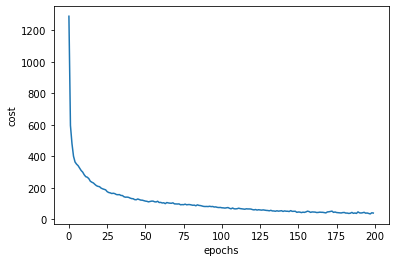

In [18]:
plot_cost()

In [ ]:
# Batch size = 64
# epochs = 200
# lr = 10

Starting testing...
Test Accuracy: 95.09 %
Test Error: 4.91 %